In [79]:
import matplotlib.pyplot as plt
import numpy as np
import imutils
import imutils.perspective as persp
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.filters import gaussian
from cv2 import cv2
import matplotlib.patches as mpatches
from skimage.measure import label, regionprops
from skimage.util import invert
from scipy.spatial.distance import euclidean
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_float
from skimage import exposure
from commonfunctions import *
from skimage.measure import find_contours

In [80]:
imagesFirst1=[]
# read the image and convert it to grayscale
car = imread('images/pic3.jfif')
grayCar=cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)

In [81]:
def IsRect(c):
    # initialize the shape name and approximate the contour
    shape =False
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)

    # if the shape has 4 vertices, it is either a square or
    # a rectangle
    if len(approx) == 4:
        # compute the bounding box of the contour and use the
        # bounding box to compute the aspect ratio
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        # a square will have an aspect ratio that is approximately
        # equal to one, otherwise, the shape is a rectangle
        if(ar < 0.95 or ar > 1.05):
            shape=True
        # if the shape is a pentagon, it will have 5 vertices
    return shape    

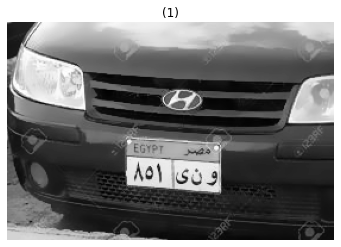

In [82]:
#applying median for reducing noise
car_denoised=cv2.bilateralFilter(grayCar,11,17,17)
imagesFirst1.append(car_denoised)
show_images(imagesFirst1)

0.5022500232861401


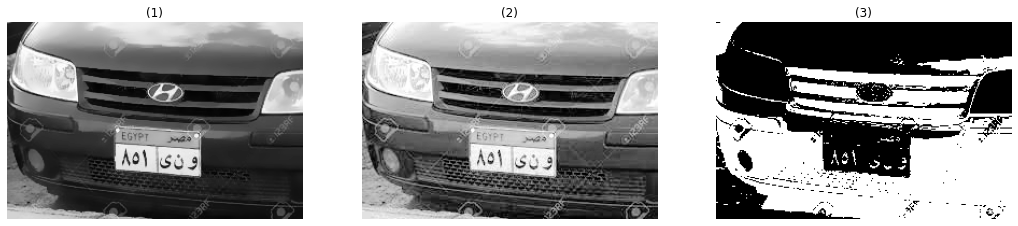

In [83]:
# Contrast stretching
#p2, p98 = np.percentile(grayCar, (2, 98))
#grayCar = exposure.rescale_intensity(grayCar, in_range=(p2, p98))
grayCar=exposure.equalize_hist(grayCar);
imagesFirst1.append(grayCar)
thresh = threshold_otsu(grayCar)
print(thresh)
#thresh = 0.46*255
binary = invert(grayCar > thresh)
imagesFirst1.append(binary)
show_images(imagesFirst1)

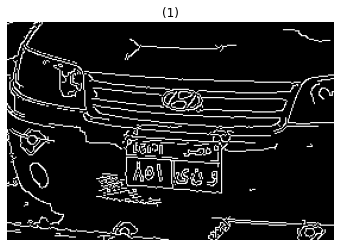

In [84]:
#using Canny edge detector
edges=cv2.Canny(car_denoised, 100,250)

#edges_bi=cv2.Canny(bi,100,250)


show_images([edges])

In [85]:
imagesC=[]

keypoints_bi = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contourss_bi=imutils.grab_contours(keypoints_bi)

print("contours found : ",len(contourss_bi))

contours found :  110


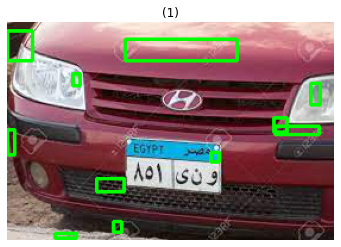

In [86]:
blackImg=np.array(car)
rectangles_points=[]
imgSize = car.shape[0]*car.shape[1]
for contour in contourss_bi:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
    # if the shape has 4 vertices, it is either a square or
    # a rectangle
    if len(approx) == 4:
        # compute the bounding box of the contour and use the
        # bounding box to compute the aspect ratio
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        # a square will have an aspect ratio that is approximately
        # equal to one, otherwise, the shape is a rectangle
        if((ar < 0.95 or ar > 1.05) and (w*h > 0.001*imgSize)):
            cv2.rectangle(blackImg, (x,y), (x+w,y+h), (0,255,0), 2)
            rectangles_points.append([x,y,x+w,h+y])

show_images([blackImg])

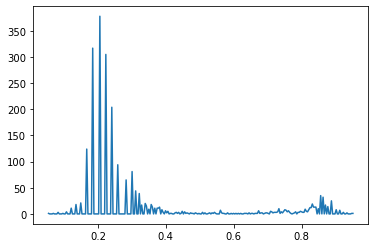

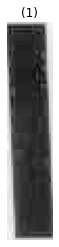

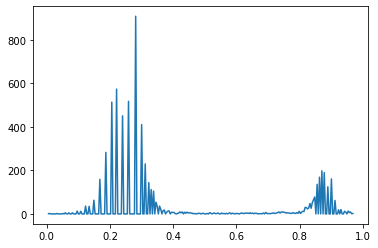

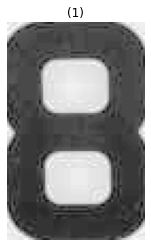

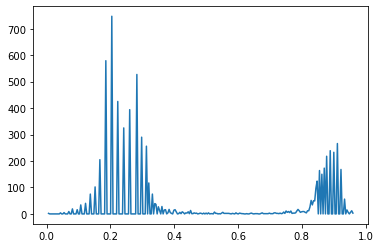

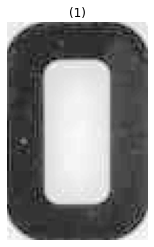

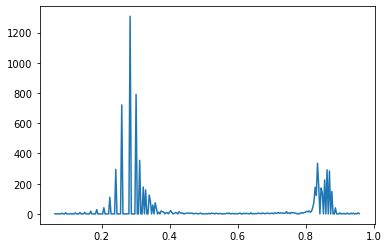

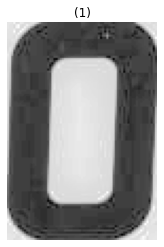

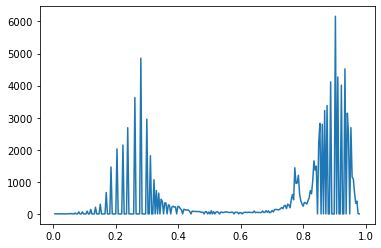

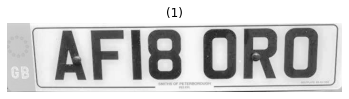

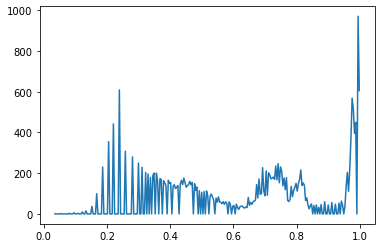

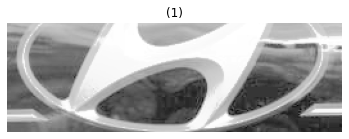

6


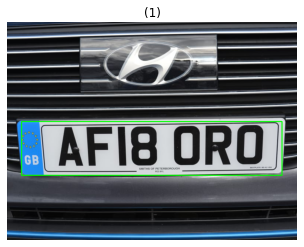

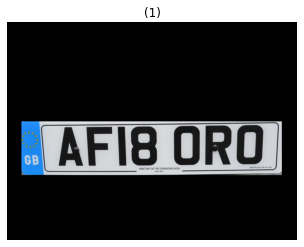

In [75]:
i1=np.zeros((car.shape[0],car.shape[1],car.shape[2]))
i1=i1.astype(int)
contours=find_contours(edges,0.8)
haveObjects=[]
max=0
maxIndex=0
for index,rect in enumerate(rectangles_points):
    haveObjects.append(0)
    for contour in contours:
        Xmax = contour[:,1].max()
        Xmin = contour[:,1].min()
        Ymax = contour[:,0].max()
        Ymin = contour[:,0].min()
        if( Xmax > rect[0] and Xmax < rect[2] and Xmin > rect[0] and Xmin < rect[2] ):
            if( Ymax > rect[1] and Ymax < rect[3] and Ymin > rect[1] and Ymin < rect[3] ):
                haveObjects[index]=haveObjects[index]+1
    if(max<haveObjects[index]):
        maxIndex=index
        max=haveObjects[index]
    i2=np.zeros((rect[2]-rect[0],rect[3]-rect[1]))
    i2=grayCar[rect[1]:rect[3],rect[0]:rect[2]]
    hist=exposure.histogram(i2)
    plt.plot(hist[1],hist[0])
    show_images([i2])
found=np.array(car)
print(haveObjects[0])
rect=rectangles_points[4]
i1[rect[1]:rect[3],rect[0]:rect[2]]= car[rect[1]:rect[3],rect[0]:rect[2]]
cv2.rectangle(found, (rect[0],rect[1]), (rect[2],rect[3]), (0,255,0), 2)
show_images([found])
show_images([i1])